# Posterior overlap with astrophysical distribution

In [2]:
# get h5 file 'posterior_samples.h5'
import numpy as np
import h5py
import matplotlib.pyplot as plt
import corner

# convert redshift to luminosity distance with astropy
from astropy.cosmology import Planck18
from astropy import units as u
from ler.rates import LeR
from scipy.interpolate import interp1d

ler = LeR(verbose=False)

z_to_dl = lambda z: Planck18.luminosity_distance(z).to(u.Mpc).value

z = np.linspace(0, 10, 1000)
luminosity_distance = Planck18.luminosity_distance(z).value
from scipy.interpolate import interp1d
dl_to_z = interp1d(luminosity_distance, z, kind='cubic', fill_value='extrapolate')

## Event

In [3]:
# read h5 file
f = h5py.File('posterior_samples.h5', 'r')

# unlensed 
events = f['Combined_PHM_lowSecondarySpin']['posterior_samples']
#events['mass_1']
# detector farme
m1 = np.array(events['mass_1_source'])
m2 = np.array(events['mass_2_source'])
unlensed_mass_1 = m1[:945]
unlensed_mass_2 = m2[:945]
unlensed_chirp_mass = ( (m1*m2)**(3/5) )/( (m1+m2)**(1/5) )
unlensed_chirp_mass = unlensed_chirp_mass[:945]
dl = np.array(events['luminosity_distance'])
unlensed_redshift = dl_to_z(dl)[:945]

## Double gaussian mass distribution

### Detectable un-lensed astrophysical distribution

In [4]:
# get the unlensed event
from ler.utils import get_param_from_json
unlensed_params = get_param_from_json('ler_data/n_unlensed_detectable_bns.json')

In [5]:
m1_unlensed = unlensed_params['mass_1_source']
m2_unlensed = unlensed_params['mass_2_source']
mc_unlensed = ( (m1_unlensed*m2_unlensed)**(3/5) )/( (m1_unlensed+m2_unlensed)**(1/5) )
zs_unlensed = unlensed_params['zs']

### Detectable lensed astrophysical distribution

In [6]:
# get the lensed event
from ler.utils import get_param_from_json
lensed_params = get_param_from_json('ler_data/n_lensed_detectable_bns.json')

In [7]:
# detectable
lensed_params_detectable = get_param_from_json('ler_data/n_lensed_detectable_bns.json')

# detector frame masses
m1_l_det = np.array(lensed_params_detectable['mass_1'])
m2_l_det = np.array(lensed_params_detectable['mass_2'])
# chirp mass
mc_l_det = m1_l_det
mc_l_det = np.array([mc_l_det, mc_l_det, mc_l_det, mc_l_det]).T
m1_l_det = np.array([m1_l_det, m1_l_det, m1_l_det, m1_l_det]).T
m2_l_det = np.array([m2_l_det, m2_l_det, m2_l_det, m2_l_det]).T

# redshifts
zs_l_det = np.array(lensed_params_detectable['zs'])
zs_l_det = np.array([zs_l_det, zs_l_det, zs_l_det, zs_l_det]).T

# observed
dl_l_eff_det = np.array(lensed_params_detectable['effective_luminosity_distance'])
zs_l_eff_det = dl_to_z(np.array(dl_l_eff_det))
mc_l_eff_det = mc_l_det/(1+zs_l_eff_det)
m1_l_eff_det = m1_l_det/(1+zs_l_eff_det)
m2_l_eff_det = m2_l_det/(1+zs_l_eff_det)

# avoid nan
zs_l_eff_det = zs_l_eff_det.flatten()
mc_l_eff_det = mc_l_eff_det.flatten()
m1_l_eff_det = m1_l_eff_det.flatten()
m2_l_eff_det = m2_l_eff_det.flatten()
zs_l_det = zs_l_det.flatten()
idx_nan = np.isnan(zs_l_eff_det)
zs_l_eff_det = zs_l_eff_det[~idx_nan]
mc_l_eff_det = mc_l_eff_det[~idx_nan]
m1_l_eff_det = m1_l_eff_det[~idx_nan]
m2_l_eff_det = m2_l_eff_det[~idx_nan]
zs_l_det = zs_l_det[~idx_nan]

# choose only detectable
snr_l_det = np.array(lensed_params_detectable['optimal_snr_net']).flatten()
snr_l_det = snr_l_det[~idx_nan]
idx_detectable = snr_l_det > 8
zs_l_eff_det = zs_l_eff_det[idx_detectable]
mc_l_eff_det = mc_l_eff_det[idx_detectable]
m1_l_eff_det = m1_l_eff_det[idx_detectable]
m2_l_eff_det = m2_l_eff_det[idx_detectable]
zs_l_det = zs_l_det[idx_detectable]

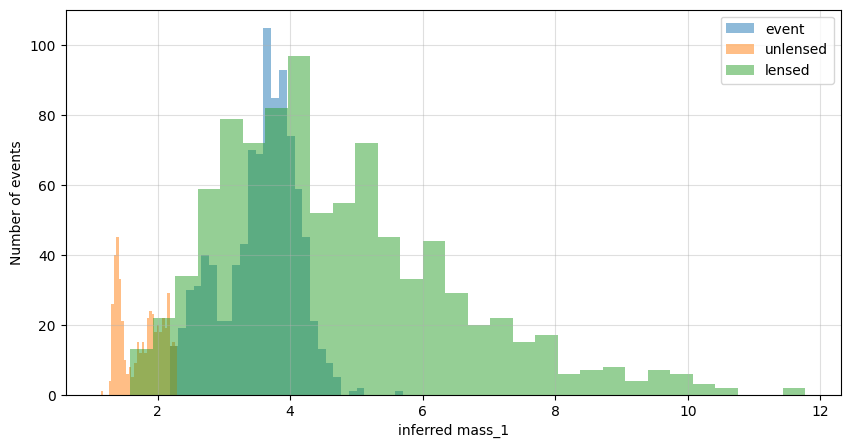

In [125]:
plt.figure(figsize=(10, 5))
plt.hist(unlensed_mass_1, bins=30, alpha=0.5, density=False, label='event')
plt.hist(m1_unlensed, bins=30, alpha=0.5, density=False, label='unlensed')
plt.hist(m1_l_eff_det, bins=30, alpha=0.5, density=False, label='lensed')
plt.xlabel('inferred mass_1')
plt.ylabel('Number of events')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

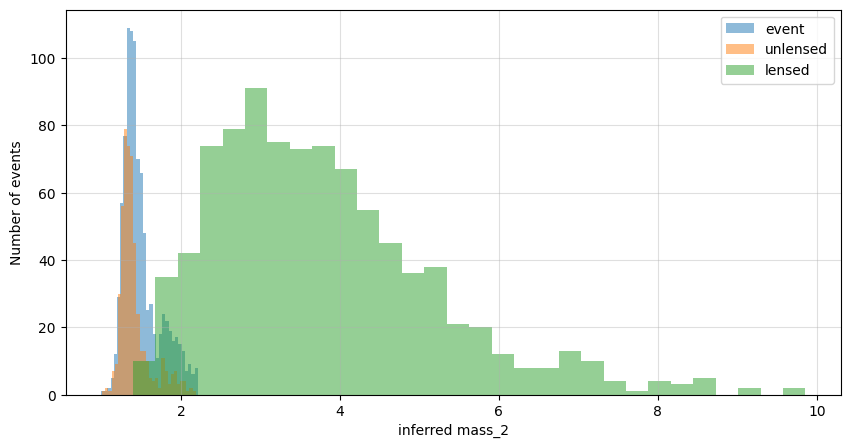

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(unlensed_mass_2, bins=30, alpha=0.5, density=False, label='event')
plt.hist(m2_unlensed, bins=30, alpha=0.5, density=False, label='unlensed')
plt.hist(m2_l_eff_det, bins=30, alpha=0.5, density=False, label='lensed')
plt.xlabel('inferred mass_2')
plt.ylabel('Number of events')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

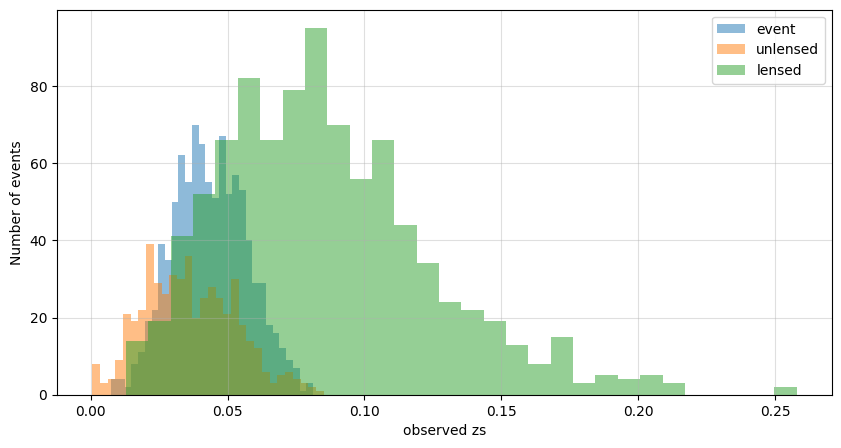

In [124]:
plt.figure(figsize=(10, 5))
plt.hist(unlensed_redshift, bins=30, alpha=0.5, density=False, label='event')
plt.hist(zs_unlensed, bins=30, alpha=0.5, density=False, label='unlensed')
plt.hist(zs_l_eff_det, bins=30, alpha=0.5, density=False, label='lensed')
plt.xlabel('observed zs')
plt.ylabel('Number of events')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Maths for posterior overlap

\begin{equation} 
\begin{split}
\mathcal{O}_U^L &= \frac{P(H_L|d)}{P(H_U|d)} \\ \nonumber
&= \frac{P(d|H_L)P(H_L)}{P(d|H_U)P(H_U)} \\ \nonumber
\end{split}
\end{equation}

\begin{equation} 
\begin{split}
\mathcal{B}_U^L &= \frac{P(d|H_L)}{P(d|H_U)} \\ \nonumber
&= \frac{\int d\theta P(d|H_L,\theta)P(\theta|H_L)}{\int d\theta P(d|H_U,\theta)P(\theta|H_U)} \\
&= \frac{P(d) \int d\theta \frac{P(\theta|d) P_{astro}(\theta|H_L)}{P_{pe}(\theta)}  }{P(d) \int d\theta \frac{P(\theta|d) P_{astro}(\theta|H_U)}{P_{pe}(\theta)}} \\
&= \frac{\int d\theta \frac{P(\theta|d) P_{astro}(\theta|H_L)}{P_{pe}(\theta)}  }{\int d\theta \frac{P(\theta|d) P_{astro}(\theta|H_U)}{P_{pe}(\theta)}} \\
&= \frac{ \left<\frac{P(\theta|d)}{P_{pe}(\theta)}\right>_{P_{astro}(\theta|H_L)} }{ \left<\frac{P(\theta|d)}{P_{pe}(\theta)}\right>_{P_{astro}(\theta|H_U)} } \\
\end{split}
\end{equation}

* $P_{astro}(\theta|H_L)$ and $P_{astro}(\theta|H_U)$ are the astrophysical distributions for lensed and un-lensed events respectively. This will from `ler`.

* P_{pe}(\theta) is the prior distribution used in parameter estimation. This will be from `bilby`.

* P(\theta|d) is the posterior distribution for the event. This will be from PE result.

### Let's find the required pdfs

* for the event

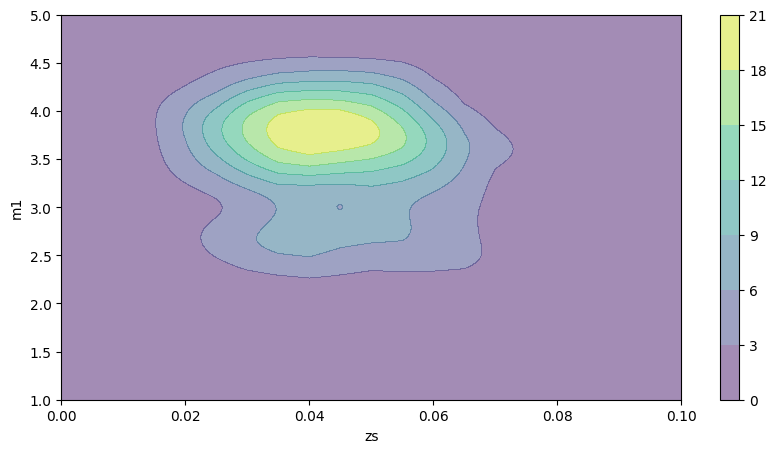

In [159]:
# let's create a 2d pdf from the sample data of m1 and zs
from scipy.stats import gaussian_kde

# unlensed
xy = np.vstack([unlensed_redshift, unlensed_mass_1])
event_kde = gaussian_kde(xy)

# new values
x_new = np.linspace(0, 5, 1000)
y_new = np.linspace(1, 12, 1000)
X, Y = np.meshgrid(x_new, y_new)
def event_pdf(X, Y):
    return event_kde(np.vstack([X.ravel(), Y.ravel()]))
Z = event_pdf(X, Y)

# plot the pdf with X, Y, Z
# make it a countour line plot
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Z.reshape(X.shape), cmap='viridis', alpha=0.5)
plt.xlabel('zs')
plt.ylabel('m1')
plt.xlim(0, 0.1)
plt.ylim(1, 5)
plt.colorbar()

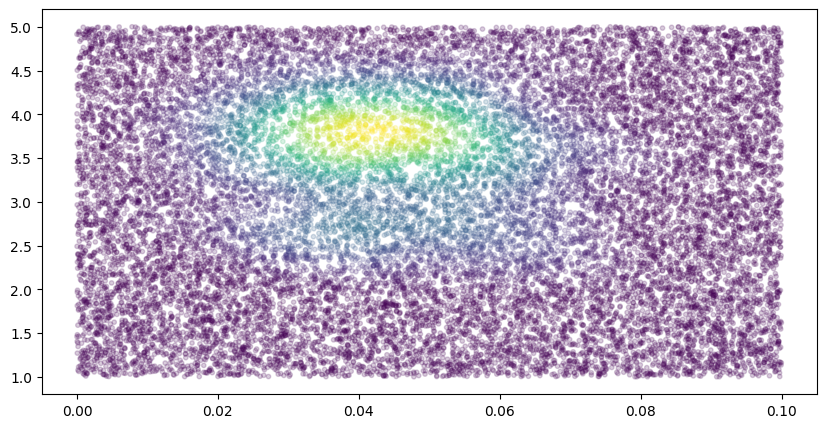

In [114]:
plt.figure(figsize=(10, 5))
x_new = np.random.uniform(0, 0.1, 20000)
y_new = np.random.uniform(1, 5, 20000)
z_new = event_pdf(x_new, y_new)

plt.scatter(x_new, y_new, c=z_new, s=10, cmap='viridis', alpha=0.2)
plt.show()

* for the bilby prior

In [115]:
from ler.rates import LeR

# max possible detector frame mass mtot_max*(1+z_max)
ler = LeR(npool=4,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51, 
          z_max=5,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

In [116]:
# convert redshift to luminosity distance with `ler`
ler.z_to_luminosity_distance(np.array([5]))

array([46652.22297278])

In [117]:
np.max(m1_l_eff_det)

11.774620275354724

In [126]:
# create a bilby prior for m1 and luminosity distance
prior = bilby.core.prior.PriorDict()
prior['mass_1'] = bilby.core.prior.Uniform(0, 12, 'mass_1')
# powerlaw prior for luminosity distance
prior['luminosity_distance'] = bilby.core.prior.PowerLaw(alpha=2, minimum=1, maximum=46652.22297278, name='luminosity_distance')

mass_1 = prior['mass_1'].sample(1000)
luminosity_distance = prior['luminosity_distance'].sample(1000)
zs = dl_to_z(luminosity_distance)

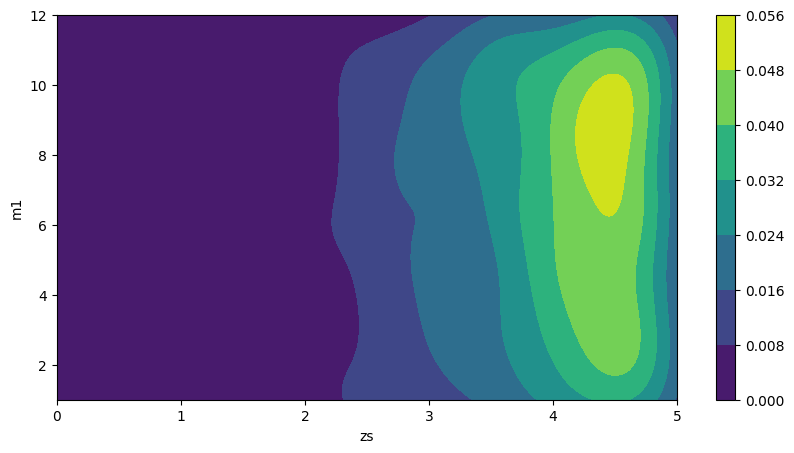

In [127]:
from scipy.stats import gaussian_kde

# get pdf for bilby prior
xy = np.vstack([zs, mass_1])
pe_kde = gaussian_kde(xy)

# new values
x_new = np.linspace(0, 5, 1000)
y_new = np.linspace(1, 12, 1000)
X, Y = np.meshgrid(x_new, y_new)
def pe_pdf(X, Y):
    return pe_kde(np.vstack([X.ravel(), Y.ravel()]))
Z = pe_pdf(X, Y)

# plot the pdf with X, Y, Z
# make it a countour line plot
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Z.reshape(X.shape), cmap='viridis')
plt.xlabel('zs')
plt.ylabel('m1')
plt.xlim(0, 5)
plt.ylim(1, 12)
plt.colorbar()


* for `ler` astrophysical samples

### Lensed

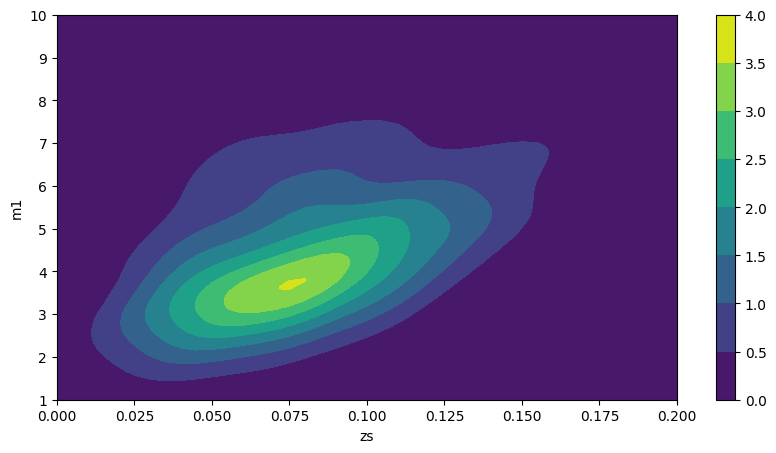

In [141]:
from scipy.stats import gaussian_kde

# get pdf for bilby prior
xy = np.vstack([zs_l_eff_det, m1_l_eff_det])
astro_kde_lensed = gaussian_kde(xy)

# new values
x_new = np.linspace(0, 5, 1000)
y_new = np.linspace(1, 12, 1000)
X, Y = np.meshgrid(x_new, y_new)
def astro_pdf_lensed(X, Y):
    return astro_kde_lensed(np.vstack([X.ravel(), Y.ravel()]))
Z = astro_pdf_lensed(X, Y)

# plot the pdf with X, Y, Z
# make it a countour line plot
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Z.reshape(X.shape), cmap='viridis')
plt.xlabel('zs')
plt.ylabel('m1')
plt.xlim(0, 0.2)
plt.ylim(1, 10)
plt.colorbar()

### Un-lensed

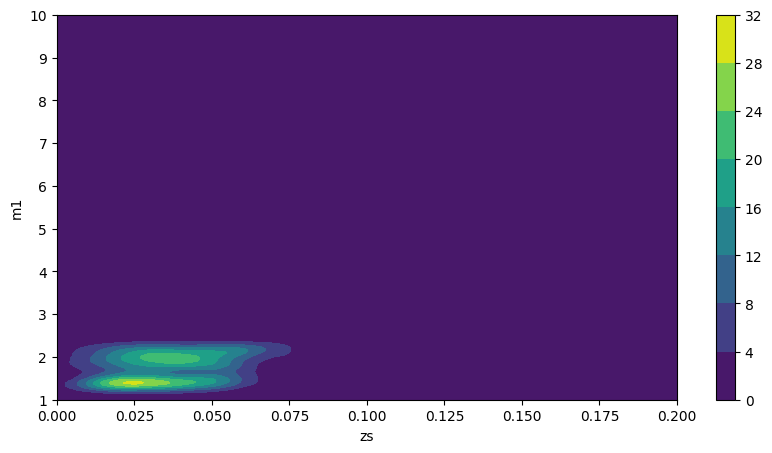

In [143]:
from scipy.stats import gaussian_kde

# get pdf for bilby prior
xy = np.vstack([zs_unlensed, m1_unlensed])
astro_kde_unlensed = gaussian_kde(xy)

# new values
x_new = np.linspace(0, 5, 1000)
y_new = np.linspace(1, 12, 1000)
X, Y = np.meshgrid(x_new, y_new)
def astro_pdf_unlensed(X, Y):
    return astro_kde_unlensed(np.vstack([X.ravel(), Y.ravel()]))
Z = astro_pdf_unlensed(X, Y)

# plot the pdf with X, Y, Z
# make it a countour line plot
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Z.reshape(X.shape), cmap='viridis')
plt.xlabel('zs')
plt.ylabel('m1')
plt.xlim(0, 0.2)
plt.ylim(1, 10)
plt.colorbar()

In [131]:
# create a sampler from astro_pdf
from ler.utils import rejection_sample2d

In [132]:
x_sample, y_sample = rejection_sample2d(
                pdf=astro_pdf, 
                xmin=0, 
                xmax=0.2,
                ymin=1,
                ymax=12,
                size=10000, 
                chunk_size=10000)

# pdf value
z_sample = astro_pdf(x_sample, y_sample)

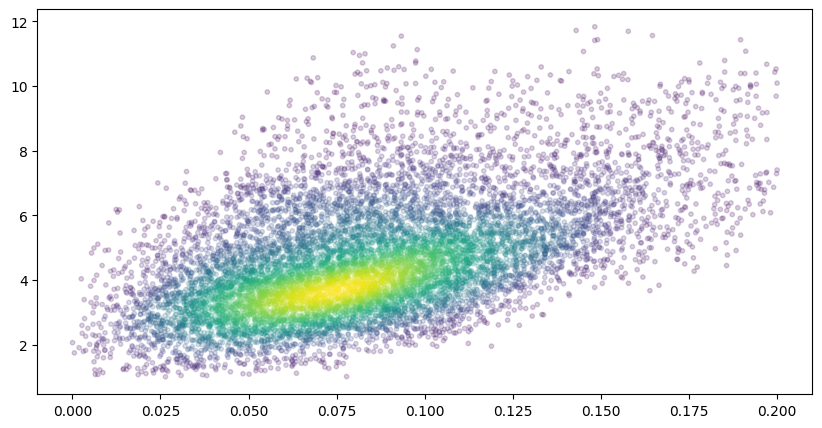

In [133]:
plt.figure(figsize=(10, 5))
plt.scatter(x_sample, y_sample, c=z_sample, s=10, cmap='viridis', alpha=0.2)
plt.show()

## Overlap function

\begin{equation} 
\begin{split}
\mathcal{O}_U^L &= \frac{ \left<\frac{P(\theta|d)}{P_{pe}(\theta)}\right>_{P_{astro}(\theta|H_L)} }{ \left<\frac{P(\theta|d)}{P_{pe}(\theta)}\right>_{P_{astro}(\theta|H_U)} } \\
\end{split}
\end{equation}

In [147]:
def BLU(size, event_pdf, pe_pdf, astro_pdf_lensed, astro_pdf_unlensed, xmin=0, xmax=5, ymin=1, ymax=12):

    # lensed event
    x_sample, y_sample = rejection_sample2d(
                pdf=astro_pdf_lensed, 
                xmin=xmin, 
                xmax=xmax,
                ymin=ymin,
                ymax=ymax,
                size=size, 
                chunk_size=10000)

    numerator = np.mean(event_pdf(x_sample, y_sample)/pe_pdf(x_sample, y_sample))

    x_sample, y_sample = rejection_sample2d(
                pdf=astro_pdf_unlensed,
                xmin=xmin, 
                xmax=xmax,
                ymin=ymin,
                ymax=ymax,
                size=size, 
                chunk_size=10000)
                
    denominator = np.mean(event_pdf(x_sample, y_sample)/pe_pdf(x_sample, y_sample))

    return numerator/denominator
    

In [148]:
BLU(10000, event_pdf, pe_pdf, astro_pdf_lensed, astro_pdf_unlensed)

3.2060024648322685

## M2

In [149]:
from scipy.stats import gaussian_kde
from scipy.stats import norm

# unlensed
xy = np.vstack([unlensed_redshift, unlensed_mass_2])
event_kde = gaussian_kde(xy)

# new values
x_new = np.linspace(0, 5, 1000)
y_new = np.linspace(1, 12, 1000)
X, Y = np.meshgrid(x_new, y_new)
def event_pdf(X, Y):
    return event_kde(np.vstack([X.ravel(), Y.ravel()]))

In [151]:
from scipy.stats import gaussian_kde

# get pdf for bilby prior
# here mass_1 prior same as mass_2 prior
xy = np.vstack([zs, mass_1])
pe_kde = gaussian_kde(xy)

# new values
x_new = np.linspace(0, 5, 1000)
y_new = np.linspace(1, 12, 1000)
X, Y = np.meshgrid(x_new, y_new)
def pe_pdf(X, Y):
    return pe_kde(np.vstack([X.ravel(), Y.ravel()]))
Z = pe_pdf(X, Y)

In [152]:
from scipy.stats import gaussian_kde

# get pdf for bilby prior
xy = np.vstack([zs_l_eff_det, m2_l_eff_det])
astro_kde_lensed = gaussian_kde(xy)

# new values
x_new = np.linspace(0, 5, 1000)
y_new = np.linspace(1, 12, 1000)
X, Y = np.meshgrid(x_new, y_new)
def astro_pdf_lensed(X, Y):
    return astro_kde_lensed(np.vstack([X.ravel(), Y.ravel()]))

In [153]:
from scipy.stats import gaussian_kde

# get pdf for bilby prior
xy = np.vstack([zs_unlensed, m2_unlensed])
astro_kde_unlensed = gaussian_kde(xy)

# new values
x_new = np.linspace(0, 5, 1000)
y_new = np.linspace(1, 12, 1000)
X, Y = np.meshgrid(x_new, y_new)
def astro_pdf_unlensed(X, Y):
    return astro_kde_unlensed(np.vstack([X.ravel(), Y.ravel()]))

In [154]:
BLU(10000, event_pdf, pe_pdf, astro_pdf_lensed, astro_pdf_unlensed)

0.03057224100738484

In [155]:
3.2060024648322685*0.03057224100738484

0.09801468002512195

In [157]:
from ler.rates import LeR

# max possible detector frame mass mtot_max*(1+z_max)
ler = LeR(npool=4,
          verbose=True, 
          event_type='BNS', 
          mtot_max=51, 
          z_max=5,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_2.pickle
merger_rate_density interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_6.pickle
binary_masses_BNS_bimodal interpolator will be loaded from ./interpolator_pickle/binary_masses_BNS_bimodal/binary_masses_BNS_bimodal_0.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_